In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Fare'] = df_test['Fare'].fillna(value=df_test.Fare.mean())
merged = pd.concat([df_train,df_test])
merged.head()
merged.shape

(1309, 12)

In [3]:
merged.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

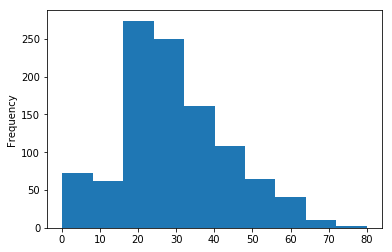

In [4]:
merged.Age.plot.hist()

In [5]:
merged.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    270
Q    123
S    914
Name: PassengerId, dtype: int64

In [6]:
merged.Cabin.fillna(value='X',inplace=True)
merged.Cabin = merged[~merged['Cabin'].isnull()]['Cabin'].apply(lambda x: x[0])

In [7]:
merged.groupby(['Cabin'])['Cabin'].count()

Cabin
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
X    1014
Name: Cabin, dtype: int64

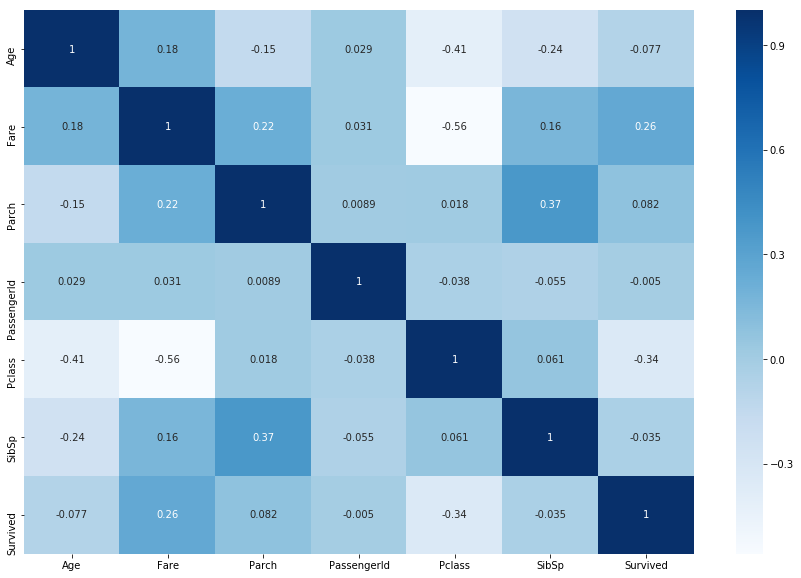

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(merged.corr(),cmap='Blues',annot=True)
plt.show()

In [9]:
merged['Age'] = merged['Age'].fillna(value=merged.Age.mean())
merged['Embarked'] = merged['Embarked'].fillna(value='S')

In [10]:
def outlier(feature):
    Q1 = np.percentile(feature,25)
    Q3 = np.percentile(feature,75)
    IQR = Q3-Q1
    u,l = (Q3 + (1.5 * IQR)),(Q1 - (1.5 * IQR))
    outliers = feature[((feature < l) | (feature > u))].index.tolist()
    return outliers
print(outlier(merged['Age']))

[7, 11, 15, 16, 33, 54, 78, 94, 96, 116, 119, 152, 164, 170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305, 326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851, 879, 2, 13, 20, 48, 69, 77, 81, 89, 96, 114, 117, 142, 152, 179, 193, 201, 213, 217, 236, 240, 250, 263, 281, 284, 296, 305, 307, 308, 314, 316, 343, 354, 356, 378, 387]


In [11]:
merged.shape

(1309, 12)

In [12]:
# Não executar esse bloco
#o_l = outlier(merged['Age'])
#merged.drop(o_l,axis=0,inplace=True)

In [13]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [14]:
merged['Sex'].replace({'male':1,'female':0},inplace=True)

In [15]:
df_copy = pd.DataFrame()
df_copy = merged

In [16]:
type(df_copy)
df_copy.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [17]:
v = ['Name','Ticket']
df_copy.drop(v,axis=1,inplace=True)

In [18]:
df_copy.head()
print(df_copy.shape)

(1309, 10)


In [19]:
ohe_df = pd.get_dummies(df_copy)

In [20]:
ohe_df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,3,1,1,0.0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,2,1,0,1,1.0,0,0,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,3,0,0,1.0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,4,1,0,1,1.0,0,0,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,5,3,1,0,0.0,0,0,0,0,0,0,0,0,1,0,0,1


In [21]:
ohe_df['Age'] = ohe_df['Age'] / ohe_df['Age'].max()
ohe_df['Fare'] = ohe_df['Fare'] / ohe_df['Fare'].max()

In [22]:
ohe_df.shape

#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(ohe_df)
#df = pd.DataFrame(x_scaled)

(1309, 20)

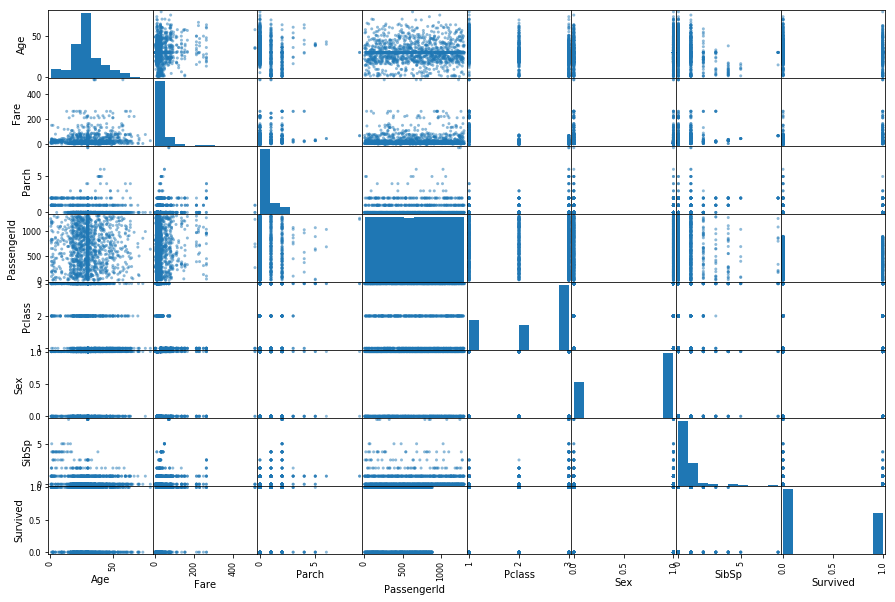

In [23]:
pd.plotting.scatter_matrix(df_copy,figsize=(15,10))
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

df_train = ohe_df.iloc[:891, :]
df_test  = ohe_df.iloc[891:, :]

df_train = df_train.drop(['PassengerId'], axis = 1)
df_test = df_test.drop(['Survived'], axis = 1)

y_train = df_train['Survived']
X_train = df_train.drop(['Survived'], axis = 1)

IDS = df_test['PassengerId']
X_test  = df_test.drop("PassengerId", axis = 1).copy()

print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

model_RL = RandomForestClassifier(random_state=15)

model_RL.fit(X_train,y_train)
predictions = model_RL.predict(X_test).astype(int)
print(predictions)

submission = pd.DataFrame({'PassengerId':IDS,'Survived':predictions})
print(submission.groupby(['Survived'])['Survived'].count())
submission.to_csv('submission.csv',index=False)

Input Matrix Dimension:   (891, 18)
Output Vector Dimension:  (891,)
Test Data Dimension:      (418, 18)
[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]
Survived
0    264
1    154
Name: Survived, dty

In [25]:
X_test.isnull().sum()

Age           0
Fare          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_X       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64